# Import required libraries

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,5)
pd.set_option('max_colwidth', None)
pd.set_option("max_columns", None) 

# Step 1: Select a real-world dataset

# Fifa World Cup
### Football Data Analysis on the matches data of fifa world cup from 1930 to 2014
#### The data used here is from kaggle [https://www.kaggle.com/abecklas/fifa-world-cup]

# Step 2: Perform data preparation & cleaning

### Load the dataset into a data frame using Pandas

In [2]:
matches = pd.read_csv('WorldCupMatches.csv')

#### Show first 5 rows in the dataset

In [3]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


#### Dataset columns names, datatypes, number of non-null values

In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

### Explore the number of rows & columns.

In [5]:
print('Our Data has {:,} rows and {} columns.'.format(matches.shape[0],matches.shape[1]))

Our Data has 4,572 rows and 20 columns.


### Handle missing, incorrect and invalid data

#### Number of null values

In [6]:
num_null_ser = matches.isnull().sum()
num_null_tup = tuple(zip(num_null_ser.index,num_null_ser))
for i in num_null_tup:
    print('Column \'{}\' has \'{}\' of its values equals null.'.format(i[0],round(i[1])))

Column 'Year' has '3720' of its values equals null.
Column 'Datetime' has '3720' of its values equals null.
Column 'Stage' has '3720' of its values equals null.
Column 'Stadium' has '3720' of its values equals null.
Column 'City' has '3720' of its values equals null.
Column 'Home Team Name' has '3720' of its values equals null.
Column 'Home Team Goals' has '3720' of its values equals null.
Column 'Away Team Goals' has '3720' of its values equals null.
Column 'Away Team Name' has '3720' of its values equals null.
Column 'Win conditions' has '3720' of its values equals null.
Column 'Attendance' has '3722' of its values equals null.
Column 'Half-time Home Goals' has '3720' of its values equals null.
Column 'Half-time Away Goals' has '3720' of its values equals null.
Column 'Referee' has '3720' of its values equals null.
Column 'Assistant 1' has '3720' of its values equals null.
Column 'Assistant 2' has '3720' of its values equals null.
Column 'RoundID' has '3720' of its values equals null

#### Handling null values

In [7]:
#To leave only rows with meaningful values
rem_val = len(matches)-num_null_ser[0]
matches2 = matches.iloc[:rem_val,:]

#### Check that there is no null values and we have complete data

In [8]:
matches2.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              2
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

#### This means that there is still 2 attedance values equals null

In [9]:
matches2[matches2.Attendance.isnull() == True]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
823,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
841,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG


#### It is redundant data that we can eliminate

In [10]:
new_matches = matches2.copy()
new_matches.drop([823,841],inplace=True)

#### Check again

In [11]:
new_matches.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

### Perform any additional steps (parsing dates, creating additional columns)

#### Change numeric columns to int

In [12]:
new_matches.loc[:,'Year'] = new_matches['Year'].astype(int)
new_matches.loc[:,'Attendance'] = new_matches['Attendance'].astype(int)
new_matches.loc[:,'Home Team Goals'] = new_matches['Home Team Goals'].astype(int)
new_matches.loc[:,'Away Team Goals'] = new_matches['Away Team Goals'].astype(int)
new_matches.loc[:,'Half-time Home Goals'] = new_matches['Half-time Home Goals'].astype(int)
new_matches.loc[:,'Half-time Away Goals'] = new_matches['Half-time Away Goals'].astype(int)
new_matches.loc[:,'Half-time Home Goals'] = new_matches['Half-time Home Goals'].astype(int)
new_matches.loc[:,'RoundID'] = new_matches['RoundID'].astype(int)
new_matches.loc[:,'MatchID'] = new_matches['MatchID'].astype(int)

#### Add new columns 'Date' , 'Time'

In [13]:
for lab, row in new_matches.iterrows():
    arr_date = row['Datetime'].split(' - ', 1)
    if arr_date[0][6] == ' ':
        new_matches.loc[lab,'Date'] = datetime.strptime(arr_date[0], '%d %b %Y')
    else:
        new_matches.loc[lab,'Date'] = datetime.strptime(arr_date[0], '%d %B %Y')
    time = datetime.strptime(arr_date[1], '%H:%M ')
    new_matches.loc[lab,'Time'] = time.strftime("%H:%M")

#### Show the new added columns

In [14]:
new_matches[['Date','Time']]

,Date,Time
0,1930-07-13,15:00
1,1930-07-13,15:00
2,1930-07-14,12:45
3,1930-07-14,14:50
4,1930-07-15,16:00
...,...,...
847,2014-07-05,17:00
848,2014-07-08,17:00
849,2014-07-09,17:00
850,2014-07-12,17:00


#### Remove 'Datetime' column

In [15]:
new_matches.drop(['Datetime'], axis=1,inplace=True)

#### Move the new columns to the left

In [16]:
new_matches.columns

Index(['Year', 'Stage', 'Stadium', 'City', 'Home Team Name', 'Home Team Goals',
       'Away Team Goals', 'Away Team Name', 'Win conditions', 'Attendance',
       'Half-time Home Goals', 'Half-time Away Goals', 'Referee',
       'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID',
       'Home Team Initials', 'Away Team Initials', 'Date', 'Time'],
      dtype='object')

In [17]:
new_matches = new_matches[['Year','Date', 'Time', 'Stage', 'Stadium', 'City', 'Home Team Name', 'Home Team Goals',
       'Away Team Goals', 'Away Team Name', 'Win conditions', 'Attendance',
       'Half-time Home Goals', 'Half-time Away Goals', 'Referee',
       'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID',
       'Home Team Initials', 'Away Team Initials']]

#### Check that changes are applied

In [18]:
new_matches.head()

,Year,Date,Time,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,1930-07-13,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,1930-07-13,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,1930-07-14,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,1930-07-14,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,1930-07-15,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


# Step 3: Perform exploratory analysis & visualization

### Compute the mean, sum, range and other interesting statistics for numeric columns

In [19]:
new_matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,8.500000e+02,8.500000e+02
mean,1985.021176,1.810588,1.022353,45164.800000,0.710588,0.429412,1.068626e+07,6.078489e+07
std,22.431301,1.612125,1.088853,23485.249247,0.937885,0.691752,2.732359e+07,1.105805e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188250e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.184000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


#### Min and Max values indcates that data is normal

### Explore distributions of numeric columns using histograms etc.

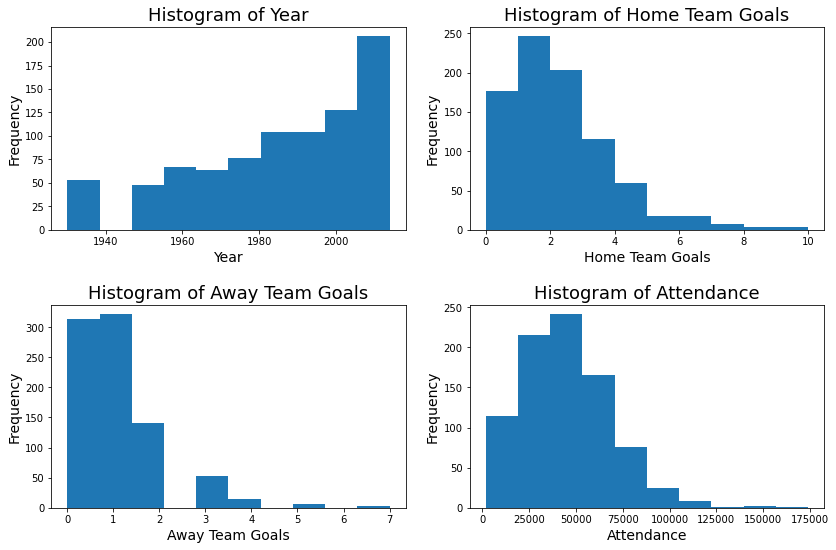

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0,0].set_title('Histogram of Year',fontsize=18)
axes[0,0].set_xlabel('Year',fontsize=14)
axes[0,0].set_ylabel('Frequency',fontsize=14)
axes[0,0].hist(new_matches['Year'])


axes[0,1].set_title('Histogram of Home Team Goals',fontsize=18)
axes[0,1].set_xlabel('Home Team Goals',fontsize=14)
axes[0,1].set_ylabel('Frequency',fontsize=14)
axes[0,1].hist(new_matches['Home Team Goals'])


axes[1,0].set_title('Histogram of Away Team Goals',fontsize=18)
axes[1,0].set_xlabel('Away Team Goals',fontsize=14)
axes[1,0].set_ylabel('Frequency',fontsize=14)
axes[1,0].hist(new_matches['Away Team Goals'])


axes[1,1].set_title('Histogram of Attendance',fontsize=18)
axes[1,1].set_xlabel('Attendance',fontsize=14)
axes[1,1].set_ylabel('Frequency',fontsize=14)
axes[1,1].hist(new_matches['Attendance'])



plt.tight_layout(pad=2);
plt.show()

#### -In Histogram of Year we notice that there is a gap between 1938 and 1950 as there is no world cup in this duration due to world war || 
#### -In Histograms of  Home and Away Team Goals we notice that nearly all teams scores range from 0 to 4 

#### -In Histogram of Attendance we notice that the mean of the value is about 50,000 

# Step 4: Ask & answer questions about the data

### 1-What is the most city host matches in fifa world cup ? 

In [21]:
city = (new_matches.City.mode().item())
no_matches = len(new_matches[new_matches.City == city])
print('The most city host matches in fifa world cup is \'{}\' with {} matches.'.format(city,no_matches))

The most city host matches in fifa world cup is 'Mexico City ' with 23 matches.


### 2-How many matches ended in extra time or penalties ?

In [22]:
#Number of matches ended in 90 mintues
matches_90 = len(new_matches [new_matches['Win conditions'] == ' '])
#Number of matches ended in extra times or penalties 
matches_ext_pen = len(new_matches) - matches_90
print('{} matches ended in extra time or penalties.'.format(matches_ext_pen))

63 matches ended in extra time or penalties.


### 3-Who is the most team palyed matches ? 

In [23]:
home_teams = new_matches['Home Team Name'].value_counts()
away_teams = new_matches['Away Team Name'].value_counts()
all_teams = home_teams + away_teams
all_teams.sort_values(ascending=False,inplace=True)
most_team = all_teams.index[0]
most_team_matches = int(all_teams[0])
print('\'{}\' is the most team palyed matches with {} matches.'.format(most_team,most_team_matches))

'Brazil' is the most team palyed matches with 108 matches.


### 4-How many matches Egypt played ?

In [24]:
egy_matches =len(new_matches[(new_matches['Home Team Name'] == 'Egypt')|(new_matches['Away Team Name'] == 'Egypt')])
print('Egypt played {} matches.'.format(egy_matches))

Egypt played 4 matches.


### 5- Who is the top five referees who have officiated the most numbers of matches ?

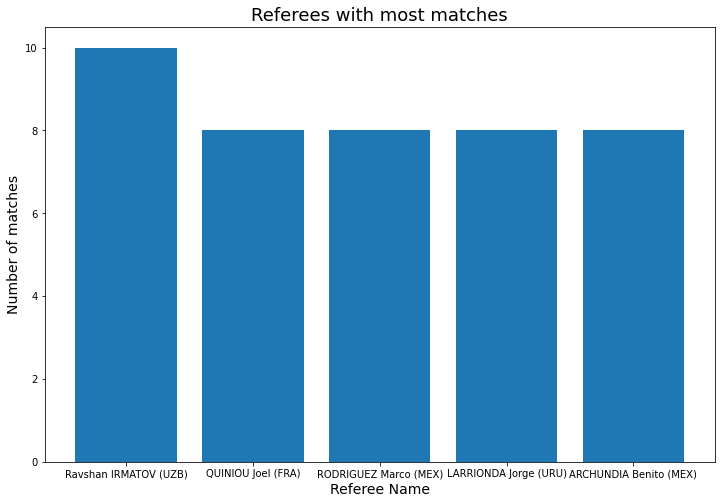

In [25]:
referees = new_matches['Referee'].value_counts().head(5)
plt.figure(figsize=(12,8))
plt.title('Referees with most matches',fontsize=18)
plt.xlabel('Referee Name',fontsize=14)
plt.ylabel('Number of matches',fontsize=14)
plt.bar(referees.index,referees.values)
plt.show()

### Ravshan IRMATOV from UZB refereed 10 matches { Most One }

### 6-What is the top ten cities that held the most number of matches?

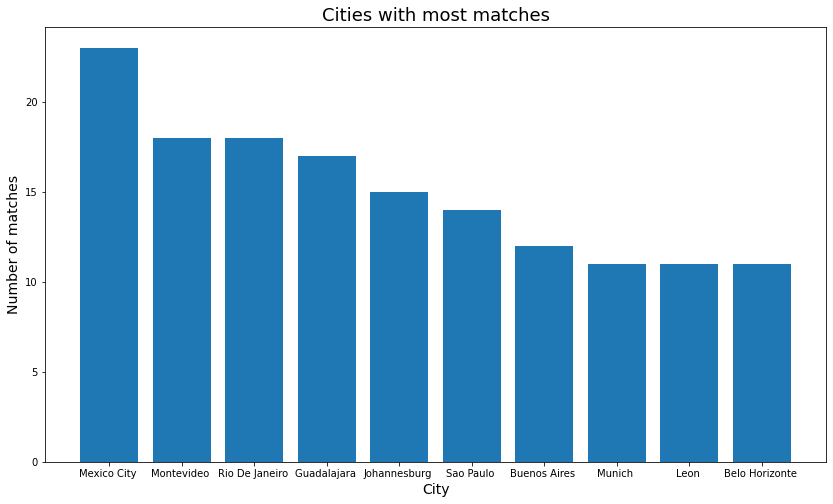

In [26]:
cities = new_matches['City'].value_counts().head(10)
plt.figure(figsize=(14,8))
plt.title('Cities with most matches',fontsize=18)
plt.xlabel('City',fontsize=14)
plt.ylabel('Number of matches',fontsize=14)
plt.bar(cities.index,cities.values)
plt.show()

In [29]:
new_matches['City'].value_counts().head(10)

Mexico City        23
Montevideo         18
Rio De Janeiro     18
Guadalajara        17
Johannesburg       15
Sao Paulo          14
Buenos Aires       12
Munich             11
Leon               11
Belo Horizonte     11
Name: City, dtype: int64

### Mexico City is the most city helds matches in World cup histroy with 10 matches.

### 7-What is the total number of goals scored in each world cup edition?

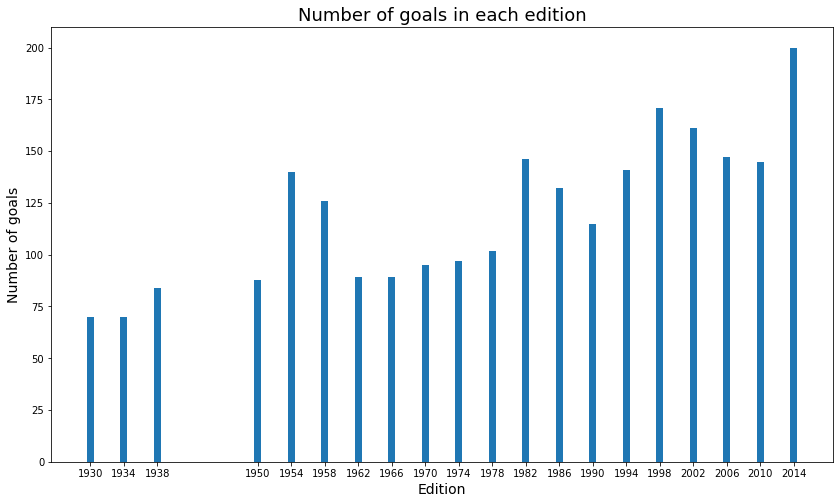

In [27]:
goals = new_matches.groupby('Year')[['Home Team Goals','Away Team Goals']].sum()
goals['Total'] = goals['Home Team Goals'] + goals['Away Team Goals']

plt.figure(figsize=(14,8))
plt.title('Number of goals in each edition',fontsize=18)
plt.xlabel('Edition',fontsize=14)
plt.ylabel('Number of goals',fontsize=14)
plt.xticks(goals.index)
plt.bar(goals.index,goals.Total)
plt.show()

### We can see that recent editions of world cup has more goals scored than old editions

# Conclusion 

### We have done data analysis project about Football matches [Fifa world cup] started by cleaning [Removing 

### Null  values] and preparing [Modify Data Types] data to be ready for analysis then d exploratory analysis 

### [Show  columns statistics] & visualization by using graphs like histograms , Finally asked interesting 

### questions on our dataset and answered them either by simple text answers or visualizations which give us 

### the answer in form of graph accompanied by explantaion for each graph. 

# References 

### The data used here is from [kaggle Website](#https://www.kaggle.com/abecklas/fifa-world-cup)
### This project is part from course {Data Analysis with Python: Zero to Pandas} on [Jovian website](#https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas)